API 요청 실패: 404 Client Error: Not Found for url: https://example.com/api/hourly-forecast


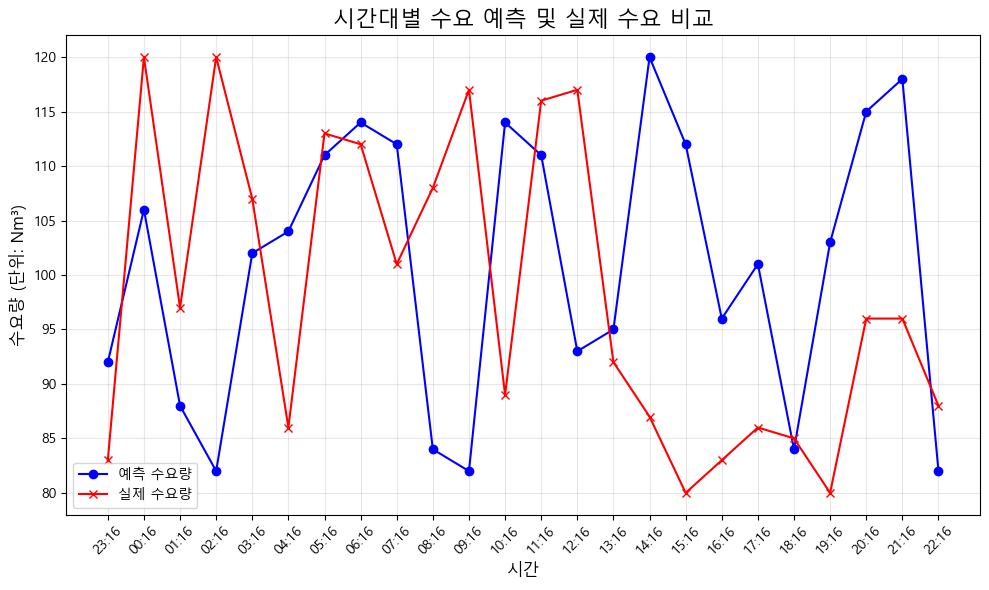

In [5]:

import matplotlib.pyplot as plt
import requests
import datetime
import random  # Mock data for example

# 실시간 수요 예측 데이터를 가져오는 함수
def get_hourly_demand_forecast(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # 오류 발생 시 예외 처리
        data = response.json()
        
        time_stamps = [entry['time'] for entry in data['forecast']]
        demand_values = [entry['predicted_demand'] for entry in data['forecast']]
        return time_stamps, demand_values
    except requests.RequestException as e:
        print(f"API 요청 실패: {e}")
        now = datetime.datetime.now()
        time_stamps = [(now + datetime.timedelta(hours=i)).strftime('%H:%M') for i in range(24)]
        demand_values = [random.randint(80, 120) for _ in range(24)]
        return time_stamps, demand_values

# 실제값을 가져오는 함수 (여기서는 랜덤 데이터로 모의)
def get_actual_demand_values():
    # 실제 데이터는 API나 데이터베이스에서 가져오는 것이 일반적입니다.
    return [random.randint(80, 120) for _ in range(24)]

# 데이터 시각화 함수
def plot_demand_forecast(time_stamps, predicted_values, actual_values):
    plt.figure(figsize=(10, 6))
    plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
    plt.plot(time_stamps, predicted_values, marker='o', label='예측 수요량', color='blue')
    plt.plot(time_stamps, actual_values, marker='x', label='실제 수요량', color='red')
    plt.title('시간대별 수요 예측 및 실제 수요 비교', fontsize=16)
    plt.xlabel('시간', fontsize=12)
    plt.ylabel('수요량 (단위: Nm³)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# API URL (실제 사용 시 변경)
API_URL = "https://example.com/api/hourly-forecast"
time_stamps, predicted_values = get_hourly_demand_forecast(API_URL)
actual_values = get_actual_demand_values()  # 실제값 가져오기
plot_demand_forecast(time_stamps, predicted_values, actual_values)
